In [1]:
import pandas as pd
df = pd.read_csv(r'\Users\lee\OneDrive\Desktop\Malaysia house price analysis\data\malaysia_house_price_data_2025.csv')
df.head()

,Township,Area,State,Tenure,Type,Median_Price,Median_PSF,Transactions
0,SCIENTEX SUNGAI DUA,Tasek Gelugor,Penang,Freehold,Terrace House,331800.0,304.0,593
1,BANDAR PUTRA,Kulai,Johor,Freehold,"Cluster House, Terrace House",590900.0,322.0,519
2,TAMAN LAGENDA TROPIKA TAPAH,Chenderiang,Perak,Freehold,Terrace House,229954.0,130.0,414
3,SCIENTEX JASIN MUTIARA,Bemban,Melaka,Freehold,Terrace House,255600.0,218.0,391
4,TAMAN LAGENDA AMAN,Tapah,Perak,Leasehold,Terrace House,219300.0,168.0,363


In [2]:
print("Data shape:", df.shape)

df.info()

print("\nMissing values:")
print(df.isnull().sum())

print("\nNumber of duplicate rows:", df.duplicated().sum())

print("\nColumns:")
print(df.columns.tolist())

Data shape: (2000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Township      2000 non-null   object 
 1   Area          2000 non-null   object 
 2   State         2000 non-null   object 
 3   Tenure        2000 non-null   object 
 4   Type          2000 non-null   object 
 5   Median_Price  2000 non-null   float64
 6   Median_PSF    2000 non-null   float64
 7   Transactions  2000 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 125.1+ KB

Missing values:
Township        0
Area            0
State           0
Tenure          0
Type            0
Median_Price    0
Median_PSF      0
Transactions    0
dtype: int64

Number of duplicate rows: 0

Columns:
['Township', 'Area', 'State', 'Tenure', 'Type', 'Median_Price', 'Median_PSF', 'Transactions']


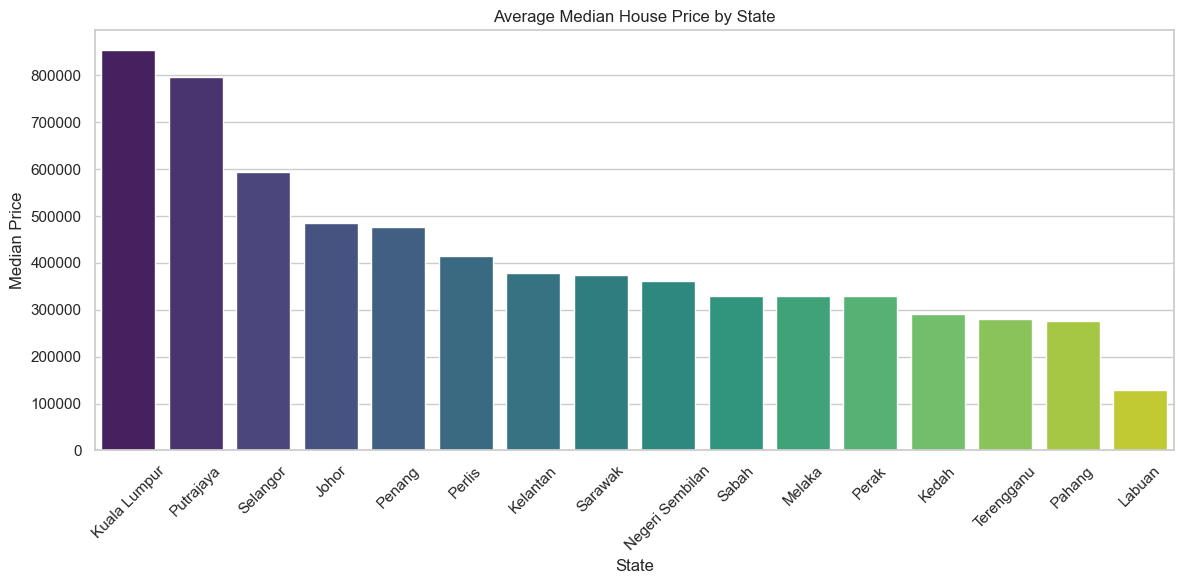

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

state_price = df.groupby("State")["Median_Price"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=state_price.index, y=state_price.values, palette='viridis',hue=state_price.index, legend= False)

plt.title("Average Median House Price by State")
plt.xlabel("State")
plt.ylabel("Median Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


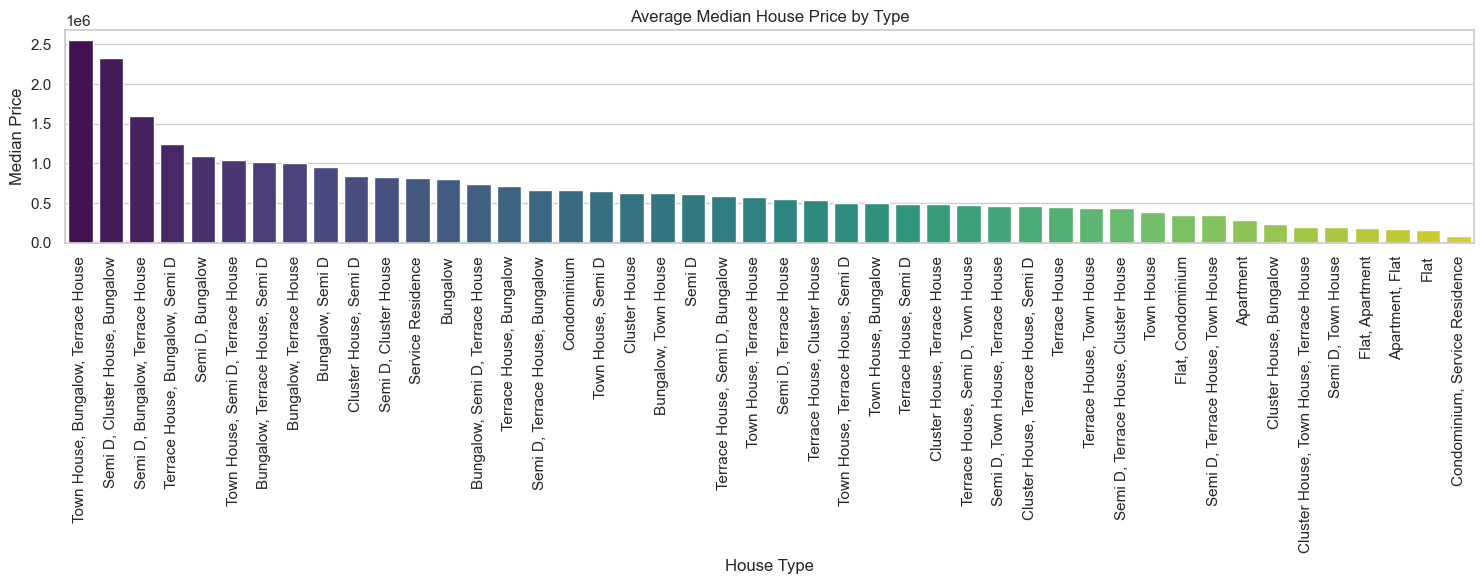

In [10]:
type_price = df.groupby("Type")["Median_Price"].mean().sort_values(ascending=False)

plt.figure(figsize=(15,6))
sns.barplot(x=type_price.index, y=type_price.values, palette="viridis", hue=type_price.index)

plt.title("Average Median House Price by Type")
plt.xlabel("House Type")
plt.ylabel("Median Price")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


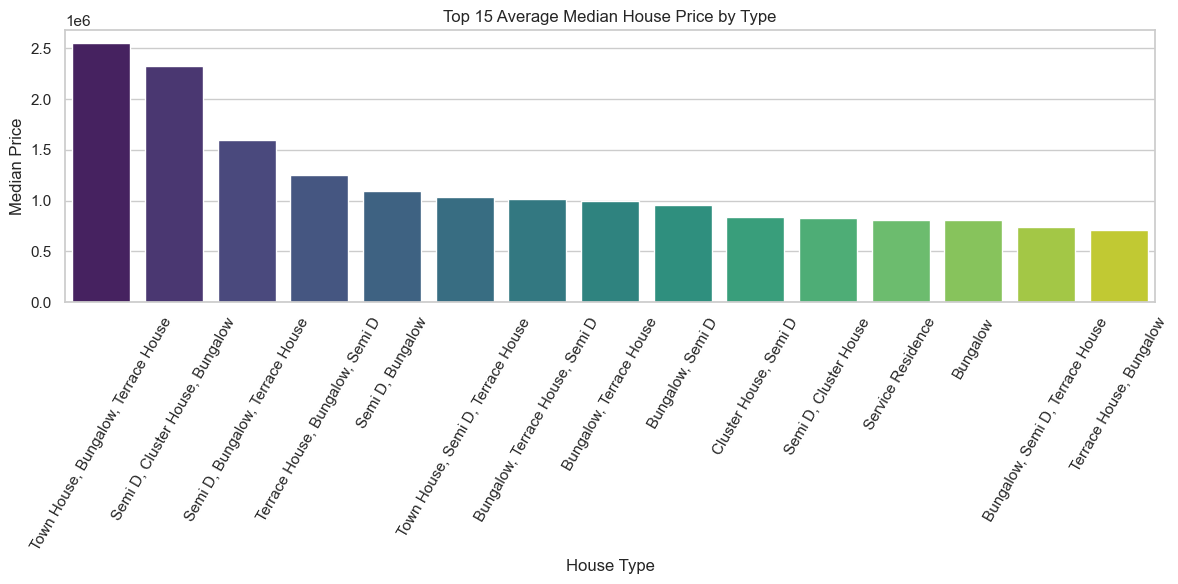

In [11]:
top_types = df.groupby("Type")["Median_Price"].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(12,6))
sns.barplot(x=top_types.index, y=top_types.values, palette="viridis", hue=top_types.index, legend=False)
plt.xticks(rotation=60)
plt.title("Top 15 Average Median House Price by Type")
plt.xlabel("House Type")
plt.ylabel("Median Price")
plt.tight_layout()
plt.show()


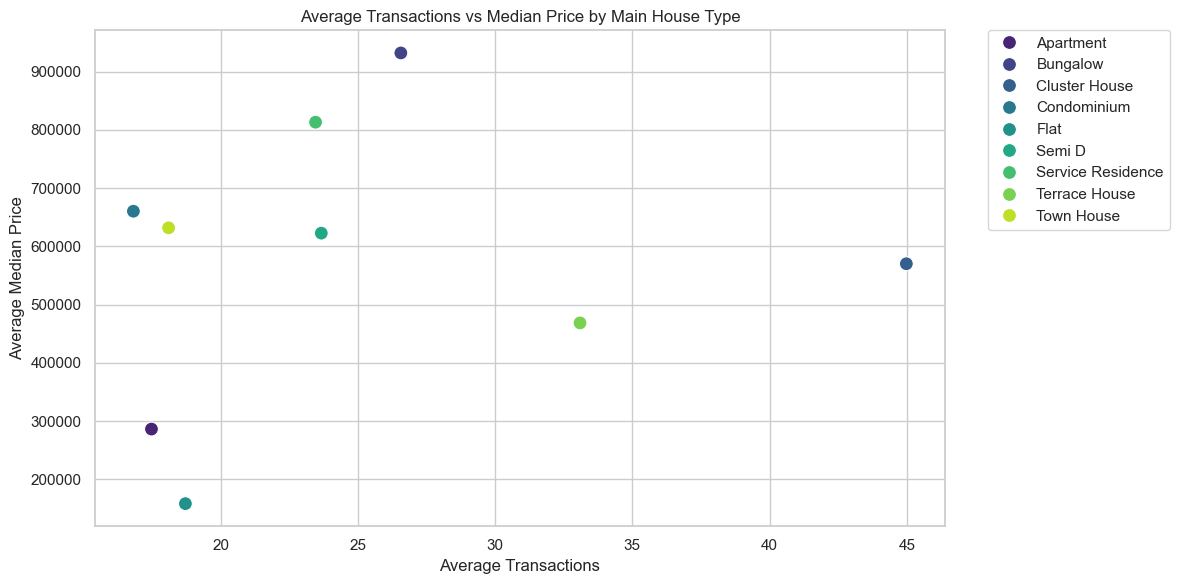

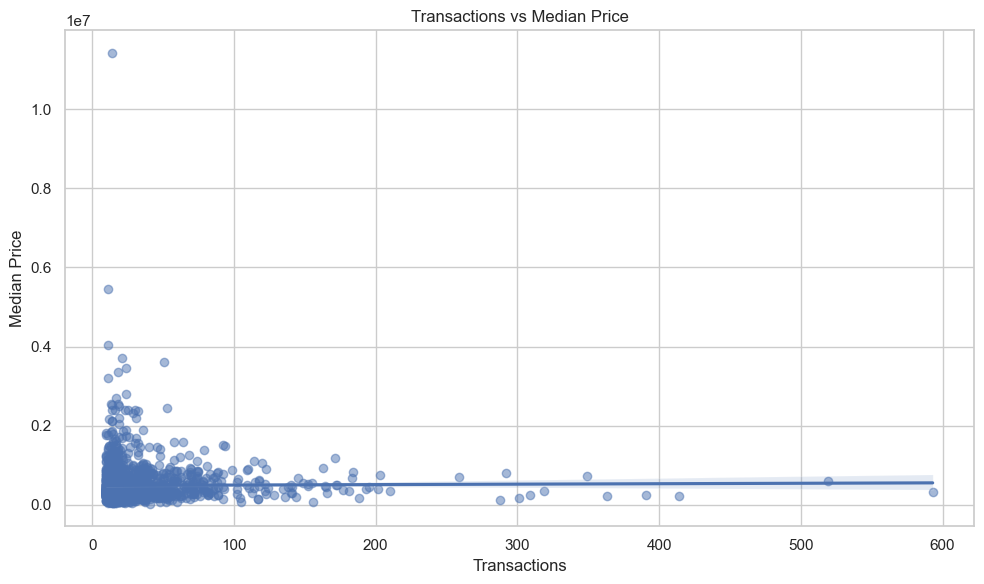

In [6]:
df['Type_Main'] = df['Type'].apply(lambda x: x.split(',')[0].strip())

type_stats = df.groupby("Type_Main").agg({"Transactions": "mean", "Median_Price": "mean"}).reset_index()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=type_stats, x="Transactions", y="Median_Price", hue="Type_Main", palette="viridis", s=100)

plt.title("Average Transactions vs Median Price by Main House Type")
plt.xlabel("Average Transactions")
plt.ylabel("Average Median Price")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x="Transactions", y="Median_Price", scatter_kws={"alpha":0.5})
plt.title("Transactions vs Median Price")
plt.xlabel("Transactions")
plt.ylabel("Median Price")
plt.tight_layout()
plt.show()


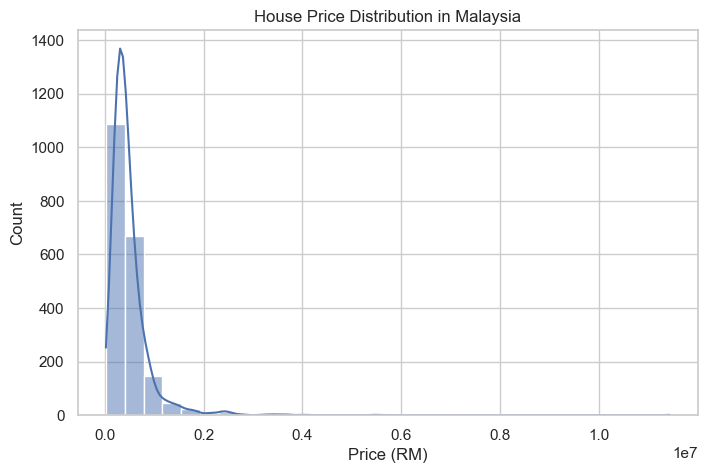

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df["Median_Price"], bins=30, kde=True)
plt.title("House Price Distribution in Malaysia")
plt.xlabel("Price (RM)")
plt.ylabel("Count")
plt.show()

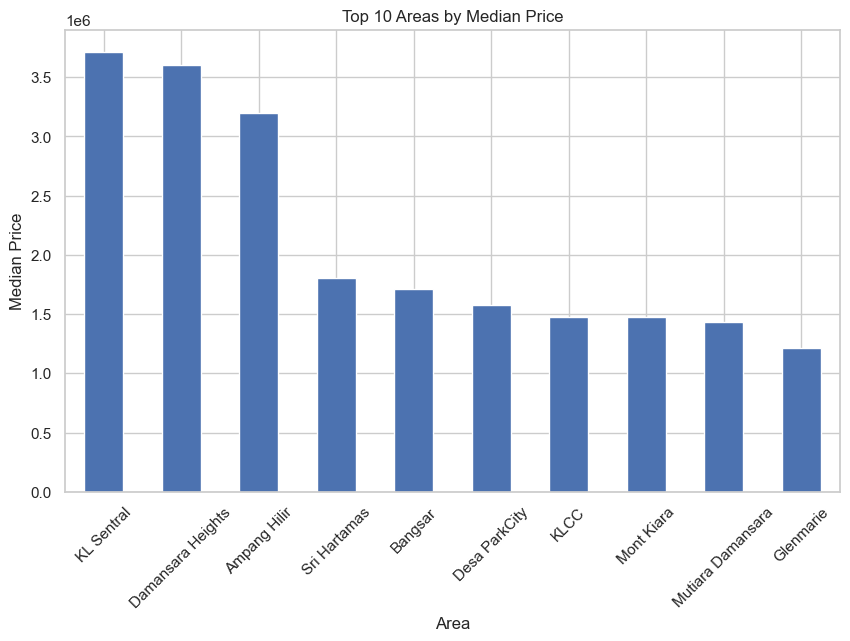

In [8]:
top_areas = df.groupby('Area')['Median_Price'].median().sort_values(ascending=False).head(10)
top_areas.plot(kind='bar', figsize=(10, 6))
plt.ylabel('Median Price')
plt.title('Top 10 Areas by Median Price')
plt.xticks(rotation=45)
plt.show()

## Conclusion & Insights

From the analysis:

- **Top 3 Most Expensive State**:
  1. 【Kuala Lumpur】 — RM【853342】
  2. 【Putrajaya】 — RM【796667】
  3. 【Selangor】 — RM【594348】

- **Top 3 Most Affordable State**:
  1. 【Labuan 】 — RM【130000】
  2. 【Pahang】 — RM【276898】
  3. 【Terengganu】 — RM【280946】

### Limitations
- The dataset may not include all property transactions in Malaysia.
- Some areas have very few records, which may affect accuracy.
- Additional factors such as property type, size, and year built were not considered in this analysis.

### Next Steps
- Incorporate more datasets (e.g., property size, transaction year, economic indicators).
- Apply predictive modeling (e.g., machine learning) to estimate future price trends.
- Conduct time-series analysis if historical data becomes available.

---

💡 *For full project details, instructions, and source code, please refer to the [README](./README.md).*


In [9]:
#avg_price_by_area = df.groupby("State")["Median_Price"].mean().sort_values(ascending=False)
#print("Top 3 Most Expensive Areas:")
#print(avg_price_by_area.head(3))
#print("\nTop 3 Cheapest Areas:")
#print(avg_price_by_area.tail(3))